In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
salesdata=pd.read_csv('advertising.csv')
salesdata

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [68]:
salesdata.isna()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [69]:
print(salesdata.isnull().sum())
print('\n',salesdata.columns)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [70]:
print(salesdata.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [71]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [72]:
print(salesdata.head(10))
print('\n',salesdata.tail(10))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   15.6

         TV  Radio  Newspaper  Sales
190   39.5   41.1        5.8   10.8
191   75.5   10.8        6.0   11.9
192   17.2    4.1       31.6    5.9
193  166.8   42.0        3.6   19.6
194  149.7   35.6        6.0   17.3
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


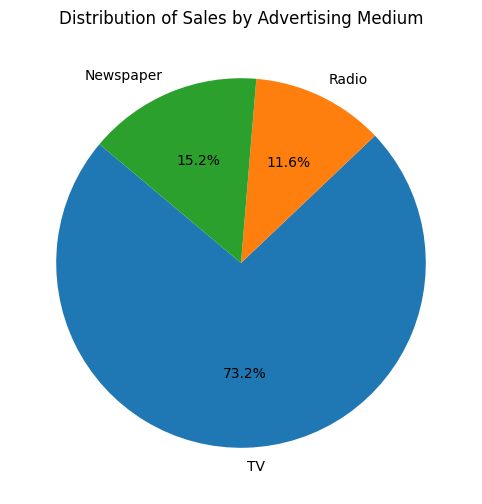

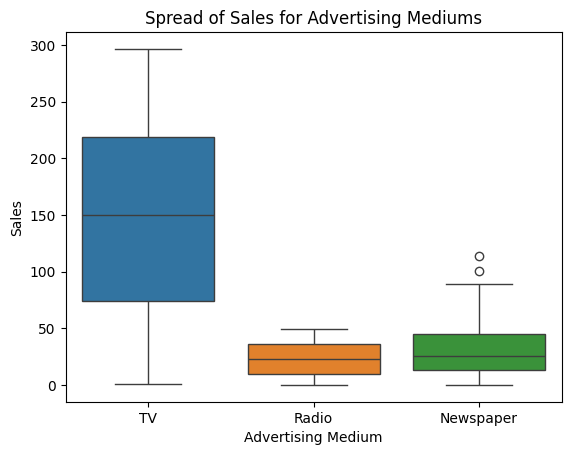

In [73]:
sales_by_medium = salesdata[['TV', 'Radio', 'Newspaper']].sum()
plt.figure(figsize=(8, 6))
plt.pie(sales_by_medium, labels=sales_by_medium.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Advertising Medium')
plt.show()

sns.boxplot(data=salesdata[['TV', 'Radio', 'Newspaper']])
plt.title('Spread of Sales for Advertising Mediums')
plt.xlabel('Advertising Medium')
plt.ylabel('Sales')
plt.show()

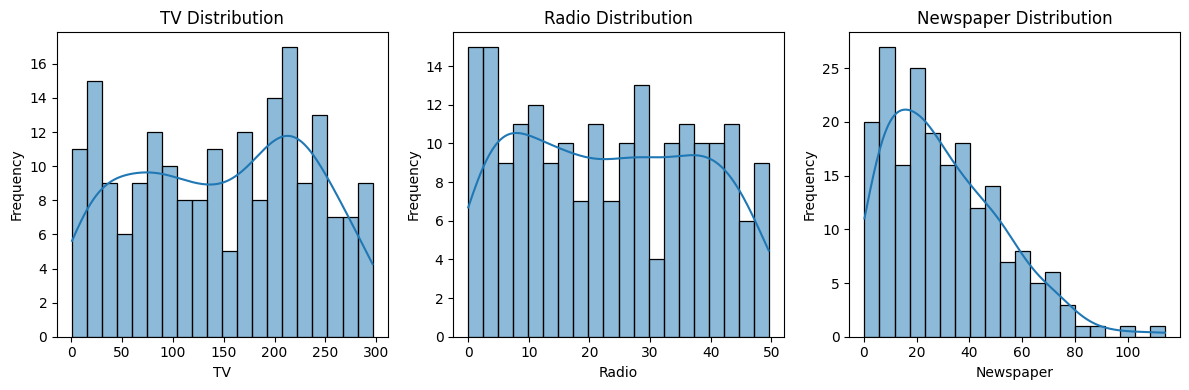

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.histplot(salesdata[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


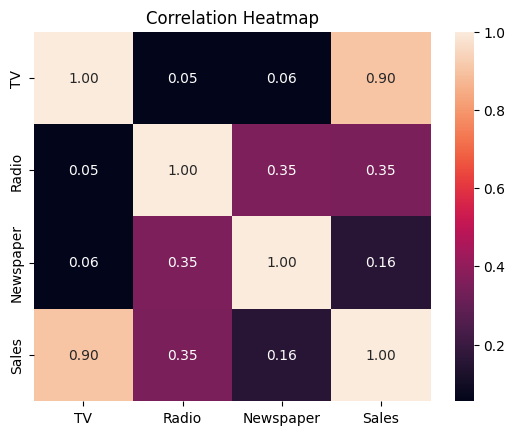

In [75]:
print(salesdata.corr())
correlation_matrix = salesdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


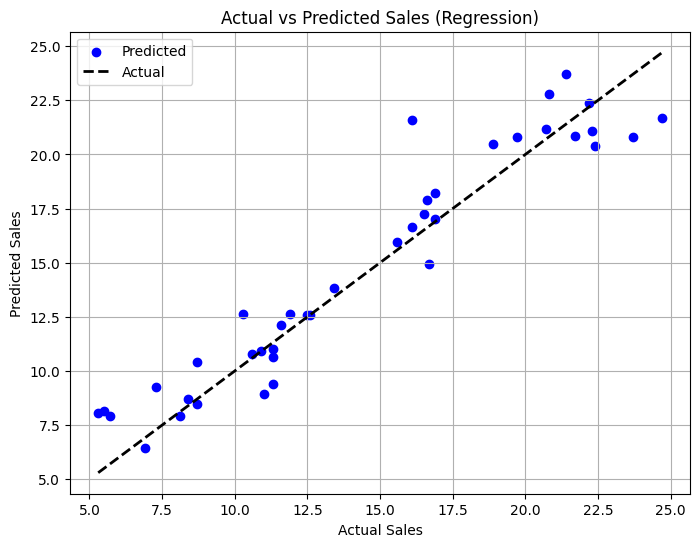

Predicted Sales for Future Period 1: $21.46
Predicted Sales for Future Period 2: $23.62
Predicted Sales for Future Period 3: $25.23


In [76]:
X = salesdata[['TV', 'Radio', 'Newspaper']]  
y = salesdata['Sales'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#the below code represents the metrics values 

print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

#this interpret the actual value and predicted value of the model it is line combined scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Regression)')
plt.legend()
plt.grid(True)
plt.show()

#this below code represents the future prediction of sales using TV,Radio,Newspaper values

future_data = pd.DataFrame({
    'TV': [250, 280, 300], 
    'Radio': [30, 35, 40],
    'Newspaper': [20, 25, 30]
})
future_sales_predictions = model.predict(future_data)
for i, sales_pred in enumerate(future_sales_predictions):
    print(f"Predicted Sales for Future Period {i+1}: ${sales_pred:.2f}")
